In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('conversions.csv')
data.head(2)

,actionId,afprice,browser,city,country,currency,date,device,goal,goalValue,ip,offer_title,os,revenue,status,sub1
0,12544.6077.615401,undefined USD,Chrome 120,Heidenau,DE,USD,8/22/2024 3:01,desktop,Interest,3,83.135.9.XXX,Nexo - CPA,Windows 10,0.0009,confirmed,tabm
1,240820S38M506H_24975638051_1,undefined SGD,Chrome 127,Singapore,SG,SGD,8/21/2024 13:35,desktop,Old User,1,116.87.113.55,Shopee SG - CPS,Windows 10,0.3125,confirmed,tabm


# Seperate revenue in seperate currencies

In [3]:
data['currency'].value_counts().reset_index(name='count')

,index,count
0,SGD,67
1,USD,33


# Show the columns

In [4]:
data.columns.tolist()

['actionId',
 'afprice',
 'browser',
 'city',
 'country',
 'currency',
 'date',
 'device',
 'goal',
 'goalValue',
 'ip',
 'offer_title',
 'os',
 'revenue',
 'status',
 'sub1']

In [5]:
import warnings
warnings.filterwarnings('ignore')
SGD = data[data.currency == "SGD"]
SGD['revenue'] = SGD['revenue'] * 63.85
USD = data[data.currency == "USD"]
USD['revenue'] = USD['revenue'] * 83.95
USD['currency'] = USD['currency'].replace("USD", "INR")
SGD['currency'] = SGD['currency'].replace("SGD", "INR")
Merge = pd.concat([SGD, USD], ignore_index=True)

# Convert date in datetime format

In [6]:
Merge['date'] = pd.to_datetime(Merge['date'], errors='coerce').dt.date

# Select Relevent columns

In [7]:
Merge_Cols = Merge[['city', 'country', 'currency', 'date', 'offer_title', 'revenue', 'status']]
Merge_Cols.head()

,city,country,currency,date,offer_title,revenue,status
0,Singapore,SG,INR,2024-08-21,Shopee SG - CPS,19.953125,confirmed
1,Singapore,SG,INR,2024-08-21,Shopee SG - CPS,3.805460,confirmed
2,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,30.009500,confirmed
3,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,6.129600,confirmed
4,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,21.076885,confirmed


# Find the sum of revenue, Region, amount

In [8]:
sales_sum = Merge['revenue'].sum()
print(int(sales_sum))

32281


# Average of Revenue by city and country and offer_title

In [9]:
Grouped_By_City = Merge_Cols.groupby(['city', 'country', 'offer_title']).agg(Average_revenue = ("revenue", 'mean')).reset_index().sort_values(by = "Average_revenue", ascending=False)

Grouped_By_City

,city,country,offer_title,Average_revenue
1,Garden Grove,US,Shopify CPA,6212.300000
7,Port Clyde,US,Thriftbooks - CPS,114.365085
0,Aurora,US,Redbubble - CPS,31.724705
5,Monrovia,US,Abebooks Global - CPS,26.494620
8,Singapore,SG,Shopee SG - CPS,15.388136
4,Molln,DE,Redbubble - CPS,9.007835
3,Lubon,PL,Nexo - CPA,0.793328
2,Heidenau,DE,Nexo - CPA,0.075555
6,Parana,AR,Nexo - CPA,0.000000


# # Data Pipeline: Filter -> Group -> Aggregate

In [10]:
Ans = (
     Merge_Cols.groupby(['city', 'country', 'offer_title', 'status'])
     .agg(
          Average_revenue = ("revenue", lambda x : int(np.ceil(x.mean()))),
          
          Total_revenue = ("revenue", lambda x :int(np.ceil(x.sum()))),
                                                                     
          Total_revenue_count = ("revenue", "count"))
     .reset_index().sort_values(by="Total_revenue", ascending=False)
     )
Ans

,city,country,offer_title,status,Average_revenue,Total_revenue,Total_revenue_count
1,Garden Grove,US,Shopify CPA,pending,6213,31062,5
8,Singapore,SG,Shopee SG - CPS,confirmed,16,1032,67
7,Port Clyde,US,Thriftbooks - CPS,confirmed,115,115,1
0,Aurora,US,Redbubble - CPS,confirmed,32,32,1
5,Monrovia,US,Abebooks Global - CPS,confirmed,27,27,1
4,Molln,DE,Redbubble - CPS,confirmed,10,10,1
3,Lubon,PL,Nexo - CPA,confirmed,1,7,8
2,Heidenau,DE,Nexo - CPA,confirmed,1,2,15
6,Parana,AR,Nexo - CPA,confirmed,0,0,1


In [11]:
result = (
    Merge_Cols.groupby(['city', 'country', 'offer_title', 'status'])
    .agg(
        Average_revenue=("revenue", "mean"),
        Total_revenue=("revenue", "sum"),
        Total_revenue_count=("revenue", "count")
    )
    .reset_index()
    .sort_values(by="Total_revenue", ascending=False)
)

result['Average_revenue'] = result['Average_revenue'].astype(int)
result['Total_revenue'] = result['Total_revenue'].astype(int)
result['Total_revenue_count'] = result['Total_revenue_count'].astype(int)
result

,city,country,offer_title,status,Average_revenue,Total_revenue,Total_revenue_count
1,Garden Grove,US,Shopify CPA,pending,6212,31061,5
8,Singapore,SG,Shopee SG - CPS,confirmed,15,1031,67
7,Port Clyde,US,Thriftbooks - CPS,confirmed,114,114,1
0,Aurora,US,Redbubble - CPS,confirmed,31,31,1
5,Monrovia,US,Abebooks Global - CPS,confirmed,26,26,1
4,Molln,DE,Redbubble - CPS,confirmed,9,9,1
3,Lubon,PL,Nexo - CPA,confirmed,0,6,8
2,Heidenau,DE,Nexo - CPA,confirmed,0,1,15
6,Parana,AR,Nexo - CPA,confirmed,0,0,1


# Time Series Analysis: Monthly Sales Trend

In [12]:
Merge_Cols['date'] = pd.to_datetime(Merge_Cols['date'], errors='coerce')
Days_sales_trend = Merge_Cols.groupby(Merge_Cols['date'].dt.to_period('d'))['revenue'].sum().reset_index()
Days_sales_trend

,date,revenue
0,2024-08-05,49.131510
1,2024-08-06,45.907085
2,2024-08-07,1679.075555
3,2024-08-08,9261.322025
4,2024-08-09,10419.253855
5,2024-08-10,0.075555
6,2024-08-11,59.788075
7,2024-08-12,45.594220
8,2024-08-13,10193.772115
9,2024-08-14,21.983555


In [13]:
Time_series_Analysis = (
                         Merge_Cols.groupby(Merge_Cols['date']
                                            .dt.to_period('d')).
                         agg(Total_Payout = ("revenue" ,lambda x : int(np.ceil(x.sum()))),
                             Total_Count = ("revenue", lambda x : int(np.ceil(x.count()))),
                             Average_revenue = ("revenue", lambda x : int(np.ceil(x.mean()))))
                         .reset_index().sort_values(by='date', ascending=True))
Time_series_Analysis

,date,Total_Payout,Total_Count,Average_revenue
0,2024-08-05,50,4,13
1,2024-08-06,46,10,5
2,2024-08-07,1680,2,840
3,2024-08-08,9262,5,1853
4,2024-08-09,10420,14,745
5,2024-08-10,1,1,1
6,2024-08-11,60,12,5
7,2024-08-12,46,5,10
8,2024-08-13,10194,6,1699
9,2024-08-14,22,4,6


In [14]:
Time_series_Analysis.to_excel('Time_series_Analysis.xlsx', index=False)

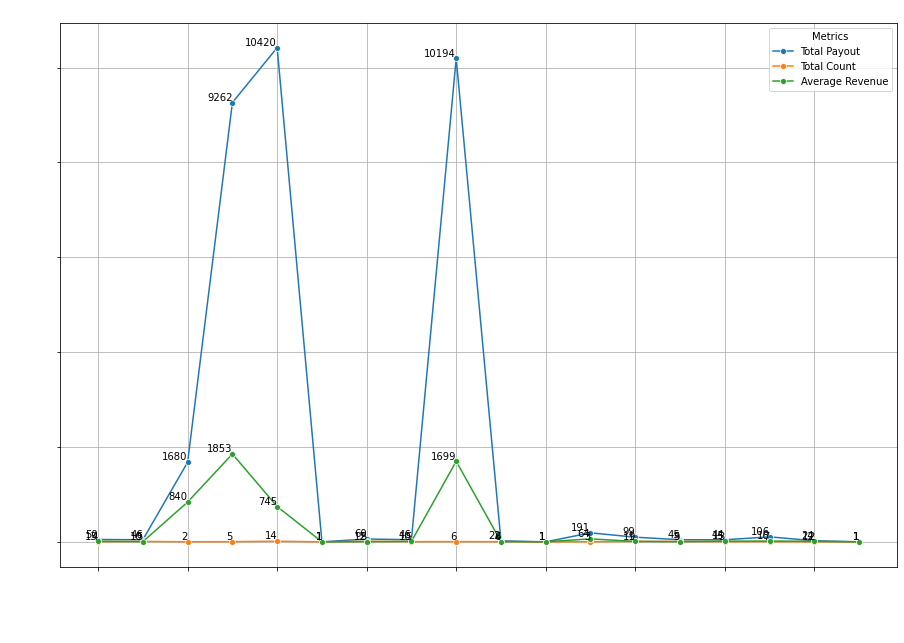

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the period to datetime for plotting
Time_series_Analysis['date'] = Time_series_Analysis['date'].dt.to_timestamp()

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot Total_Payout
sns.lineplot(data=Time_series_Analysis, x='date', y='Total_Payout', marker='o', label='Total Payout')

# Plot Total_Count
sns.lineplot(data=Time_series_Analysis, x='date', y='Total_Count', marker='o', label='Total Count')

# Plot Average_revenue
sns.lineplot(data=Time_series_Analysis, x='date', y='Average_revenue', marker='o', label='Average Revenue')

# Adding data labels
for line in ['Total_Payout', 'Total_Count', 'Average_revenue']:
    for x, y in zip(Time_series_Analysis['date'], Time_series_Analysis[line]):
        plt.text(x, y, f'{y}', ha='right', va='bottom')

# Formatting the plot
plt.title('Time Series Analysis of Revenue Metrics', color = "white", weight = "bold")
plt.xlabel('Date', color = "white")
plt.ylabel('Revenue Metrics', color = "white")
plt.legend(title='Metrics')
plt.xticks(rotation = 45, color = 'white')
plt.yticks(color = 'white')
plt.grid(True)

# Display the plot
plt.show()


In [16]:
Merge_Cols

,city,country,currency,date,offer_title,revenue,status
0,Singapore,SG,INR,2024-08-21,Shopee SG - CPS,19.953125,confirmed
1,Singapore,SG,INR,2024-08-21,Shopee SG - CPS,3.805460,confirmed
2,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,30.009500,confirmed
3,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,6.129600,confirmed
4,Singapore,SG,INR,2024-08-20,Shopee SG - CPS,21.076885,confirmed
...,...,...,...,...,...,...,...
95,Monrovia,US,INR,2024-08-08,Abebooks Global - CPS,26.494620,confirmed
96,Garden Grove,US,INR,2024-08-07,Shopify CPA,1679.000000,pending
97,Heidenau,DE,INR,2024-08-07,Nexo - CPA,0.075555,confirmed
98,Heidenau,DE,INR,2024-08-06,Nexo - CPA,0.075555,confirmed
